In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


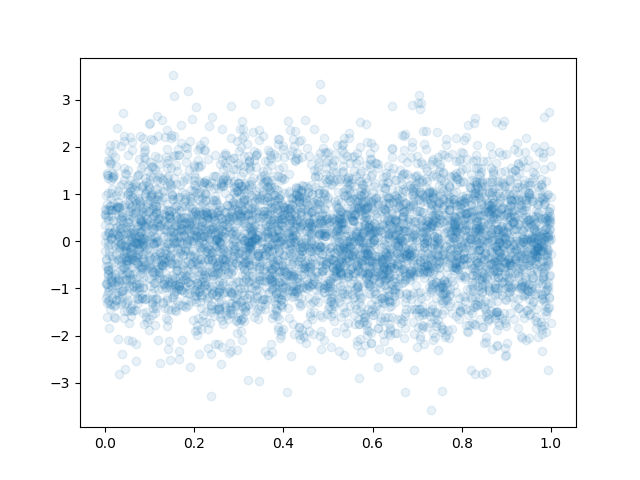

In [31]:
X = np.random.rand(5000)
Y = np.random.randn(5000) #randomizing 5000 value

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.1)

In [3]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT', '^GSPC']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [4]:
data = data['Adj Close']

In [5]:
data.head()

Symbols,AAPL,TWTR,IBM,MSFT,^GSPC
Date,,,,,
2019-12-31,72.245941,32.049999,114.547295,154.430405,3230.780029
2020-01-02,73.894333,32.299999,115.726616,157.289902,3257.850098
2020-01-03,73.175919,31.520000,114.803680,155.331329,3234.850098
2020-01-06,73.759003,31.639999,114.598572,155.732849,3246.280029
2020-01-07,73.412117,32.540001,114.675476,154.312912,3237.179932


In [22]:
log_returns = np.log(data/data.shift())

In [23]:
log_returns

Symbols,AAPL,TWTR,IBM,MSFT,^GSPC
Date,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.022560,0.007770,0.010243,0.018347,0.008344
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530,-0.007085
2020-01-06,0.007937,0.003800,-0.001788,0.002582,0.003527
2020-01-07,-0.004714,0.028048,0.000671,-0.009160,-0.002807
...,...,...,...,...,...
2022-02-17,-0.021499,-0.022605,-0.033133,-0.029719,-0.021401
2022-02-18,-0.009400,-0.031831,-0.004974,-0.009678,-0.007192
2022-02-22,-0.017973,-0.041344,-0.003464,-0.000730,-0.010195


In [24]:
def linear_regression(tickerA, tickerB):
    #making two data sets for equation
    X = log_returns[tickerA].iloc[1:].to_numpy().reshape(-1, 1)#reshape takes two argument. reshape(row, column). used for manipulating col and rows with arrays
    Y = log_returns[tickerB].iloc[1:].to_numpy().reshape(-1, 1)
    #making numpy array. removing 1st item with iloc because it is null when refined via log.

    lin_reg = LinearRegression()
    lin_reg.fit(X, Y)

    Y_pred = lin_reg.predict(X) #looking/predicting at the changes in Y(sp500) for changes in X(apple)

    alpha = lin_reg.intercept_[0]
    beta = lin_reg.coef_[0, 0] #coefficient shows the cause and effect which is the slope which represents the actual changes

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ', Beta: ' + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

In [25]:
#this line shows relation of apple to sp500 and its not perfect because of those outliers. we can get more
#clear view via measuring coefficient.
#

In [26]:
alpha, beta #if apple price increase by 1% the market price of sp500 goes .56%. but it is expected not guaranteed. alpha shows

(-0.0003185818047217571, 0.5614381791799786)

<IPython.core.display.Javascript object>


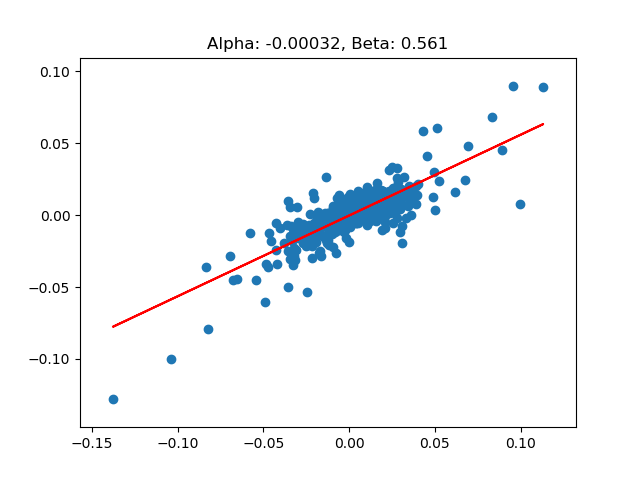

In [27]:
linear_regression("AAPL", "^GSPC")

<IPython.core.display.Javascript object>


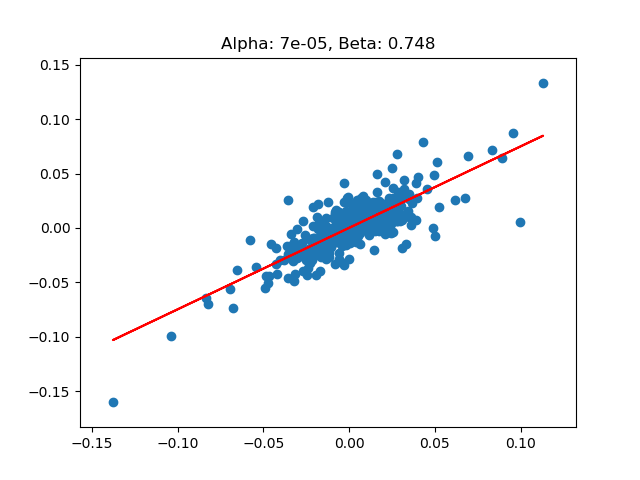

In [29]:
linear_regression('AAPL', 'MSFT')

##### in x axis x is the independent variable and y is the dependent variable. we are predicting the changes of y when x changes. for example when apple changes how sp500 changes. the curve here shows the movement. as it is upword, it expresses that there is postive correlation and movement of y when x changes